# Support Vector Machine

# Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Load and Preprocess the Data

In [2]:
# Load dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")

# Create Binary Target Column

In [3]:
# Create expertise level from reputation
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)

# Convert to binary classification
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High')


# Drop Irrelevant Columns

In [4]:
# Drop unnecessary columns
drop_cols = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date',
    'is_employee', 'account_age_years', 'reputation', 'expertise_level'
]
user_details_data.drop(columns=drop_cols, inplace=True)


# Handle Missing Values and Encode Categorical Columns

In [5]:
# Fill missing values
user_details_data = user_details_data.fillna(0)

# Encode categorical columns
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode target column
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])
user_details_data.drop(columns=['expertise_binary'], inplace=True)


In [6]:
user_details_data.to_csv("cleaned data for svm.csv")

# Train-Test Split and Feature Scaling

In [7]:
# Split features and target
X = user_details_data.drop(columns=['expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['expertise_binary_encoded'])
y_test_df = pd.DataFrame(y_test, columns=['expertise_binary_encoded'])

X_train_scaled_df.to_csv("train_data svm.csv")
X_test_scaled_df.to_csv("test_data for svm.csv")

### SVM Models


Kernel: Linear, C: 0.001
Accuracy: 0.7359
              precision    recall  f1-score   support

         Low       0.81      0.62      0.70     10479
        High       0.69      0.86      0.76     10481

    accuracy                           0.74     20960
   macro avg       0.75      0.74      0.73     20960
weighted avg       0.75      0.74      0.73     20960



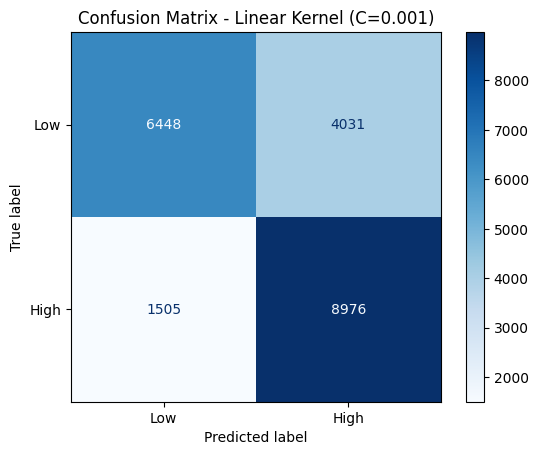


Kernel: Linear, C: 0.01
Accuracy: 0.7479
              precision    recall  f1-score   support

         Low       0.82      0.64      0.72     10479
        High       0.70      0.86      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.74     20960
weighted avg       0.76      0.75      0.74     20960



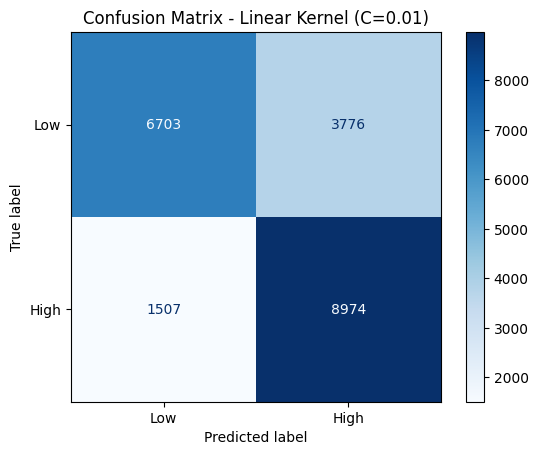


Kernel: Linear, C: 0.1
Accuracy: 0.7495
              precision    recall  f1-score   support

         Low       0.81      0.65      0.72     10479
        High       0.71      0.85      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.75     20960
weighted avg       0.76      0.75      0.75     20960



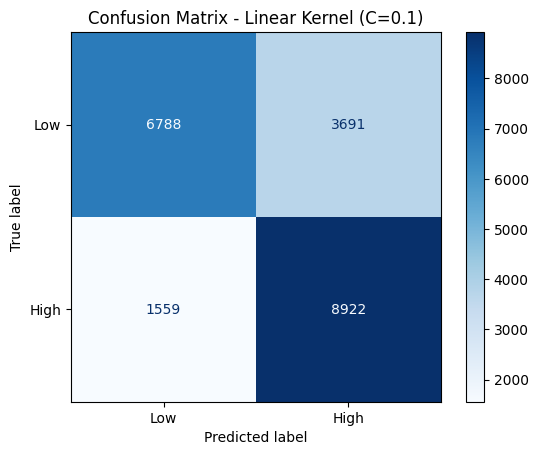


Kernel: Poly, C: 0.001
Accuracy: 0.5577
              precision    recall  f1-score   support

         Low       0.99      0.12      0.21     10479
        High       0.53      1.00      0.69     10481

    accuracy                           0.56     20960
   macro avg       0.76      0.56      0.45     20960
weighted avg       0.76      0.56      0.45     20960



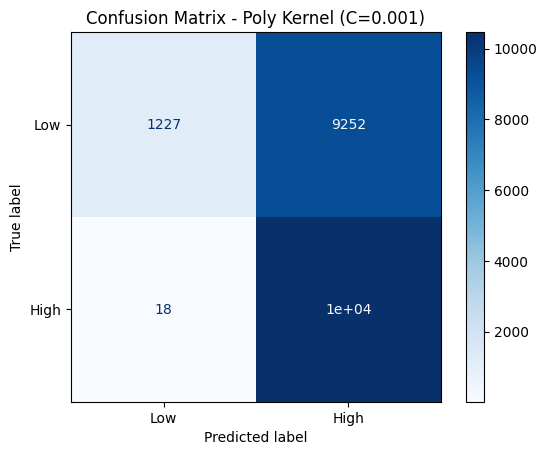


Kernel: Poly, C: 0.01
Accuracy: 0.6302
              precision    recall  f1-score   support

         Low       0.94      0.28      0.43     10479
        High       0.58      0.98      0.73     10481

    accuracy                           0.63     20960
   macro avg       0.76      0.63      0.58     20960
weighted avg       0.76      0.63      0.58     20960



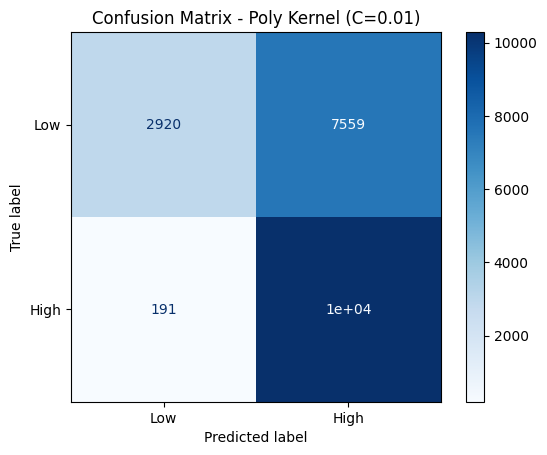


Kernel: Poly, C: 0.1
Accuracy: 0.7268
              precision    recall  f1-score   support

         Low       0.80      0.60      0.69     10479
        High       0.68      0.85      0.76     10481

    accuracy                           0.73     20960
   macro avg       0.74      0.73      0.72     20960
weighted avg       0.74      0.73      0.72     20960



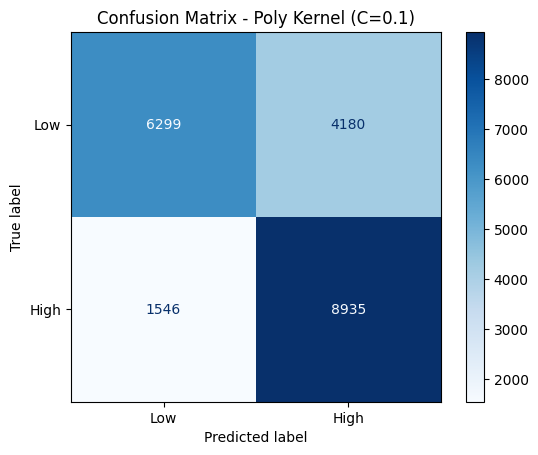


Kernel: Rbf, C: 0.001
Accuracy: 0.7176
              precision    recall  f1-score   support

         Low       0.82      0.56      0.66     10479
        High       0.66      0.88      0.76     10481

    accuracy                           0.72     20960
   macro avg       0.74      0.72      0.71     20960
weighted avg       0.74      0.72      0.71     20960



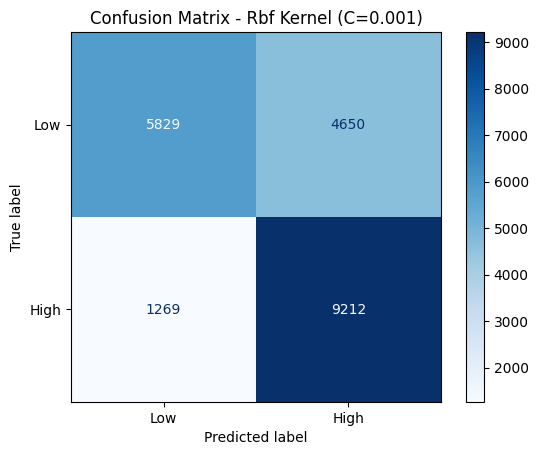


Kernel: Rbf, C: 0.01
Accuracy: 0.7368
              precision    recall  f1-score   support

         Low       0.81      0.62      0.70     10479
        High       0.69      0.86      0.76     10481

    accuracy                           0.74     20960
   macro avg       0.75      0.74      0.73     20960
weighted avg       0.75      0.74      0.73     20960



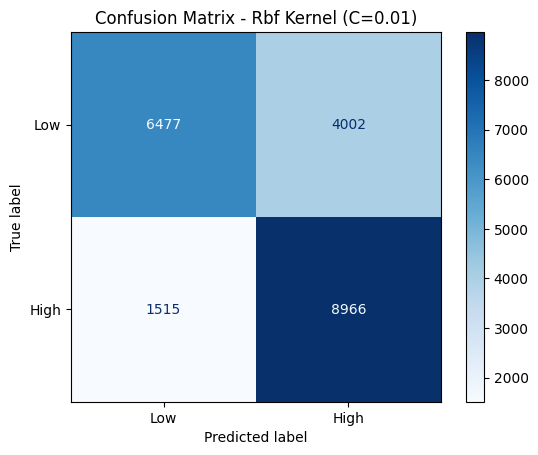


Kernel: Rbf, C: 0.1
Accuracy: 0.7494
              precision    recall  f1-score   support

         Low       0.82      0.64      0.72     10479
        High       0.70      0.86      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.75     20960
weighted avg       0.76      0.75      0.75     20960



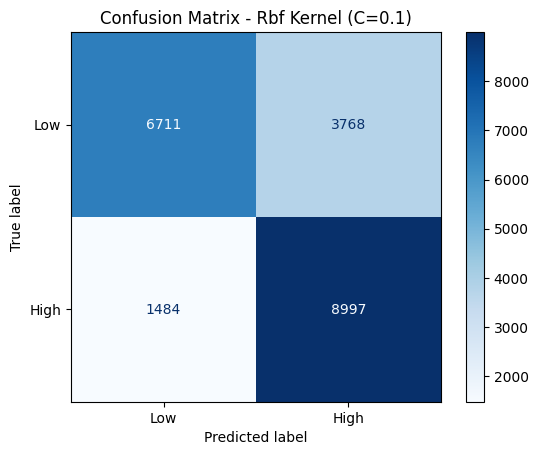

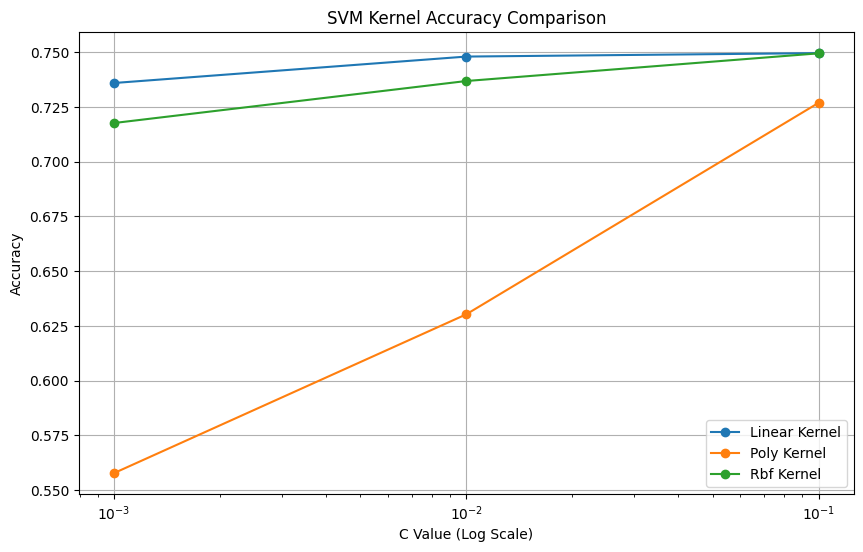

In [9]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.001, 0.01, 0.1]   # Smaller C values

# Dictionary to store accuracies for comparison
accuracies = {}

for kernel in kernels:
    accuracies[kernel] = []
    for C in C_values:
        print(f'\nKernel: {kernel.capitalize()}, C: {C}')

        # Create and train the SVM model
        svm_model = SVC(kernel=kernel, C=C, gamma='scale')
        svm_model.fit(X_train_scaled, y_train)

        # Predict using the model
        y_pred = svm_model.predict(X_test_scaled)

        # Evaluate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[kernel].append(acc)
        print(f'Accuracy: {acc:.4f}')

        # Classification report
        print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

        # Confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Low', 'High'], cmap='Blues')
        plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel (C={C})')
        plt.show()

# Accuracy Comparison Plot
fig, ax = plt.subplots(figsize=(10, 6))
for kernel in kernels:
    ax.plot(C_values, accuracies[kernel], marker='o', label=f'{kernel.capitalize()} Kernel')

ax.set_xscale('log')
ax.set_xlabel('C Value (Log Scale)')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Kernel Accuracy Comparison')
ax.legend()
plt.grid(True)
plt.show()


1. Linear Kernel Performance

The SVM models using a Linear Kernel consistently demonstrated strong and stable performance across all tested C values (0.001, 0.01, and 0.1). At C=0.001, the model achieved an overall accuracy of 73.59%, with precision and recall skewed slightly—better at detecting "High Expertise" users (recall 86%) than "Low Expertise" (recall 62%). As the regularization parameter C increased to 0.01 and 0.1, a slight improvement was observed: accuracy rose to 74.79% and 74.95% respectively. Additionally, the recall for Low Expertise users improved modestly from 62% to 64%-65%, while recall for High Expertise users remained strong at around 85%-86%. The confusion matrices support these metrics, showing an increase in correctly classified Low users with higher C values. In conclusion, the Linear Kernel performed reliably across all regularization settings, with C=0.1 achieving the best balance between Low and High Expertise classification.

2. Polynomial Kernel Performance

The models employing a Polynomial Kernel displayed a very different behavior. At C=0.001, performance was poor, with an overall accuracy of only 55.77%. The confusion matrix revealed that the model was heavily biased towards predicting High Expertise users, almost entirely misclassifying Low Expertise users (recall for Low: 12%). As the C value increased to 0.01, the model’s performance improved significantly to 63.02% accuracy. However, the bias towards High Expertise predictions persisted, albeit slightly reduced. Only at C=0.1 did the Polynomial Kernel deliver a competitive result, achieving an accuracy of 72.68%. At this setting, the model balanced the prediction between Low and High Expertise users more reasonably, reflected by improved recall scores (Low: 60%, High: 85%). Despite this progress, the Polynomial Kernel overall lagged behind the Linear and RBF Kernels in stability and initial performance, requiring higher C values to reach reasonable accuracy.

3. RBF Kernel Performance

The Radial Basis Function (RBF) Kernel consistently showed strong performance across all tested C values, maintaining a close competition with the Linear Kernel. At C=0.001, the RBF model started with an accuracy of 71.76%, slightly lower than the Linear Kernel at the same C value but still robust. Importantly, the recall for High Expertise users remained high (88%), though the recall for Low Expertise users (56%) was weaker, indicating the model was better at identifying experts than beginners at this lower regularization strength. As C increased to 0.01 and 0.1, the RBF model’s accuracy improved to 73.68% and 74.94%, closely matching the Linear Kernel’s performance. At C=0.1, the confusion matrix showed a strong balance between the two classes with Low Expertise recall improving to 64% and High Expertise recall holding steady at 86%. Overall, the RBF Kernel demonstrated excellent adaptability and generalization, especially at higher C values.

Overall Comparison and Insights

Linear Kernel emerged as the most consistently reliable performer, achieving the highest and most stable accuracy across C values without drastic fluctuations. It maintained strong classification ability for High Expertise users while progressively improving Low Expertise user detection as regularization increased.
Polynomial Kernel was highly sensitive to the choice of C. It performed poorly at lower C values, heavily favoring High Expertise users, but became more competitive only at C=0.1. However, even at its best, it slightly lagged behind the Linear and RBF Kernels in both accuracy and balance across classes.
RBF Kernel displayed competitive results similar to the Linear Kernel, especially at higher C values. It offered better handling of non-linear relationships in the data and slightly better generalization for complex patterns. It performed strongly for identifying High Expertise users, although detection of Low Expertise users lagged slightly at lower C values.

The SVM kernel accuracy comparison shows that the RBF and Linear kernels consistently outperform the Polynomial kernel across all C values tested. While both RBF and Linear kernels achieve similar peak accuracy around 75% at C=0.1, the Polynomial kernel trails behind, although it steadily improves with higher C values, reaching approximately 72.5% at C=0.1. The Linear kernel maintains slightly better stability across the range, while the RBF kernel gradually closes the gap as C increases. These results indicate that for this classification task, simpler decision boundaries (Linear) or flexible non-linear boundaries (RBF) are more effective than polynomial transformations.

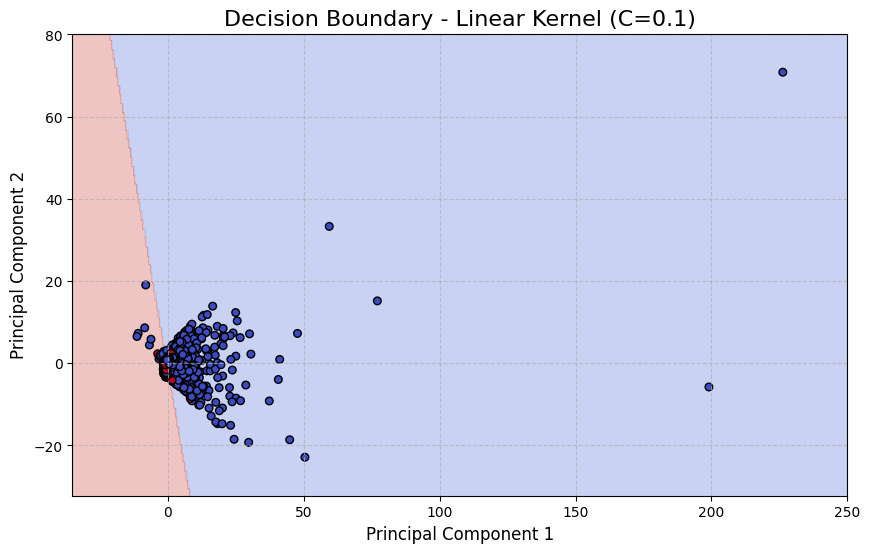

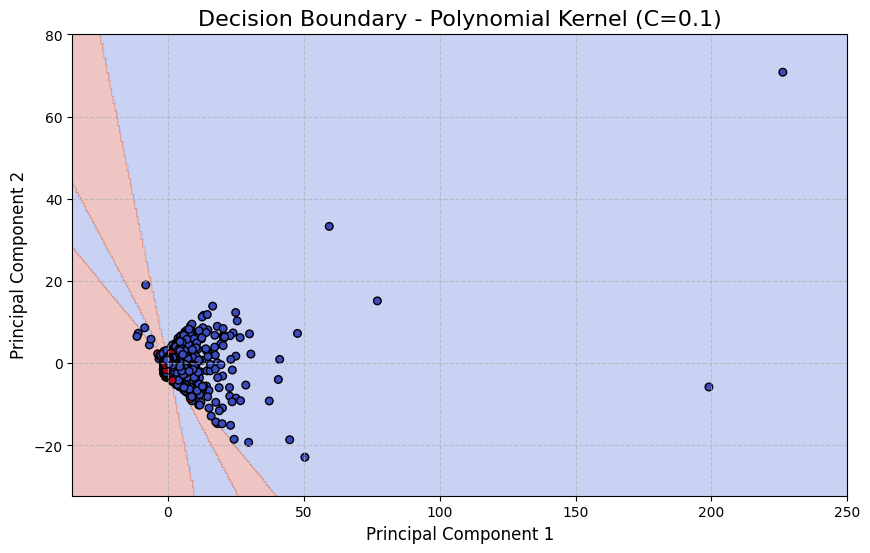

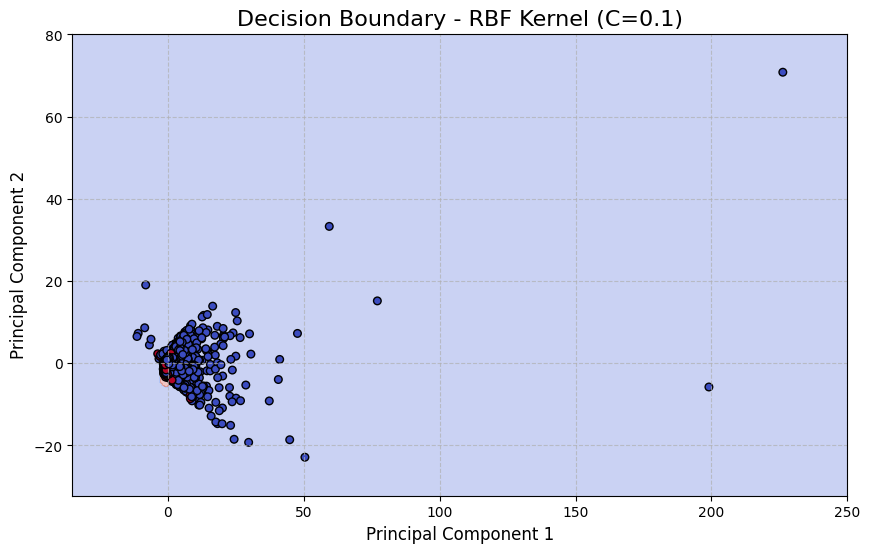

In [10]:
# --- PCA for visualization ---
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

def plot_decision_boundary(X, y, model, title):
    zoom_margin_x = 0.1 * (X[:, 0].max() - X[:, 0].min())
    zoom_margin_y = 0.1 * (X[:, 1].max() - X[:, 1].min())
    
    x_min, x_max = X[:, 0].min() - zoom_margin_x, X[:, 0].max() + zoom_margin_x
    y_min, y_max = X[:, 1].min() - zoom_margin_y, X[:, 1].max() + zoom_margin_y
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k', s=30)
    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.xlim(x_min, x_max) 
    plt.ylim(y_min, y_max) 
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


# Linear kernel
svm_linear = SVC(kernel='linear', C=0.1)
svm_linear.fit(X_train_pca, y_train)
plot_decision_boundary(X_test_pca, y_test, svm_linear, "Decision Boundary - Linear Kernel (C=0.1)")

# Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=0.1)
svm_poly.fit(X_train_pca, y_train)
plot_decision_boundary(X_test_pca, y_test, svm_poly, "Decision Boundary - Polynomial Kernel (C=0.1)")

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_rbf.fit(X_train_pca, y_train)
plot_decision_boundary(X_test_pca, y_test, svm_rbf, "Decision Boundary - RBF Kernel (C=0.1)")


1. Linear Kernel (C=0.1)

The decision boundary created by the Linear kernel is a straight line that separates the two classes. This indicates that the model assumes the relationship between features is linearly separable after the PCA transformation. While the boundary is simple and generalizes well, it may not fully capture complex patterns or outliers, as a few points on the left side are misclassified. Overall, the Linear SVM provides a robust yet straightforward separation, ideal when the data distribution is relatively clean and mostly linearly divisible.

2. Polynomial Kernel (C=0.1)

The decision boundary created by the Polynomial kernel is noticeably more complex and curved. It attempts to capture intricate patterns in the data by introducing non-linear decision boundaries. However, the boundary appears overly fragmented, suggesting a risk of overfitting—where the model tries to perfectly capture the training data but may fail to generalize well to unseen data. This behavior is typical of polynomial kernels with higher flexibility, especially when the underlying feature relationships are not strongly non-linear.

3. RBF Kernel (C=0.1)

The RBF (Radial Basis Function) kernel forms a smooth and adaptive non-linear decision boundary. Compared to the Polynomial kernel, the RBF boundary is cleaner and follows the natural spread of the data without being overly complex. It adapts better to the data's structure, flexibly bending where needed to separate the classes effectively. The RBF kernel strikes a good balance between capturing non-linear patterns and maintaining generalization, making it highly suitable for datasets where relationships between features are complex but not chaotic.

Linear Kernel creates a simple and effective boundary when classes are nearly linearly separable but may miss subtle patterns.
Polynomial Kernel introduces non-linear boundaries but can easily overfit, especially on noisy or moderately complex datasets.
RBF Kernel offers the best flexibility, accurately modeling non-linear relationships without excessive complexity, leading to a cleaner and more generalized separation.